# Proyek Analisis Data: [Bike Sharing Dataset]
* Nama: [Evelyn Eunike Aritonang]
* Email: [evlyn.art@gmail.com]
* ID Dicoding: [evelyn21]

## Menentukan Pertanyaan Bisnis
1. Bagaimana tren penyewaan sepeda perbulan pada tahun 2011 dan 2012?
2. Pada musim apa terjadi penyewaan tertinggi sepanjang tahun 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


1. day_df (data harian) Berisi informasi peminjaman sepeda per hari, termasuk cuaca, suhu, kelembaban, kecepatan angin, dan jumlah peminjam (baik pengguna biasa maupun terdaftar).
2. hour_df (data per jam) Mirip dengan day_df, tetapi lebih rinci karena mencatat data setiap jamnya.

### Assesing Data 

#### Menilai tabel day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


1. Kualitas Data:
* Tidak ada data yang kosong (missing values) dalam dataset day_df dan hour_df.
* Tidak ada data yang duplikat, sehingga kualitas data cukup baik.
  
2. Struktur Data:
* day_df memiliki 16 kolom dengan 731 entri (data harian).
* hour_df memiliki 17 kolom dengan 17.379 entri (data per jam).
* Kolom dalam kedua dataset mencakup informasi tentang cuaca, suhu, kecepatan angin, dan jumlah pengguna.

### Cleaning Data

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Pada struktur data, saya mengubah kolom dteday pada day_df dan hour_df menjadi format datetime menggunakan pd.to_datetime().

## Exploratory Data Analysis (EDA)

#### Explore Data

In [20]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dataset ini terdiri dari 731 entri yang mencakup informasi penggunaan fasilitas berdasarkan hari. Setelah dilakukan analisis statistik deskriptif, ditemukan bahwa suhu rata-rata adalah 0.49, dengan nilai minimum 0.05 dan maksimum 0.86. Kelembapan cenderung tinggi dengan rata-rata 0.62, sementara kecepatan angin memiliki nilai rata-rata 0.19, menunjukkan bahwa dalam sebagian besar hari, kondisi angin relatif tenang.

Dari segi hari kerja, dataset menunjukkan bahwa sekitar 68% hari merupakan hari kerja, yang berarti penggunaan fasilitas kemungkinan lebih banyak terjadi pada hari-hari kerja dibandingkan akhir pekan. Pola musiman juga tampak jelas dengan perbedaan penggunaan di setiap musim. Secara umum, dataset ini memberikan gambaran yang baik tentang bagaimana faktor-faktor lingkungan dan kalender dapat memengaruhi penggunaan fasilitas secara harian.

In [21]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Dataset ini memiliki ukuran yang lebih besar dibandingkan dataset harian, dengan 17.379 entri, yang merepresentasikan pola penggunaan fasilitas berdasarkan jam. Dari segi waktu, data menunjukkan bahwa aktivitas penggunaan fasilitas cenderung meningkat pada siang hari, dengan median jam penggunaan berada pada pukul 12:00 siang. Namun, terdapat juga variasi yang cukup besar tergantung pada faktor hari kerja dan musim.

Dari segi cuaca, suhu rata-rata dalam dataset ini mirip dengan dataset harian, yaitu sekitar 0.49, dengan kelembapan rata-rata 0.62 dan kecepatan angin 0.19. Kondisi ini menunjukkan tren yang konsisten antara data harian dan per jam terkait kondisi lingkungan.

##### Grouping berdasarkan musim

In [22]:
hour_df.groupby("season").aggregate(
    dteday_nunique=("dteday", "nunique"),
    cnt_max=("cnt", "max"),
    cnt_min=("cnt", "min"),
    cnt_mean=("cnt", "mean"),
    cnt_std=("cnt", "std")
)

,dteday_nunique,cnt_max,cnt_min,cnt_mean,cnt_std
season,,,,,
1,181,801,1,111.114569,119.224010
2,184,957,1,208.344069,188.362473
3,188,977,1,236.016237,197.711630
4,178,967,1,198.868856,182.967972


Setelah saya perhatikan, berdasarkan musim terlihat bahwa jumlah penggunaan fasilitas bervariasi di setiap musim. Contohnya, pada musim ketiga (musim panas), penggunaan fasilitas memiliki rata-rata tertinggi sekitar 236 pengguna per jam, sementara musim lainnya menunjukkan angka yang lebih rendah. Berarti faktor cuaca dan musim memiliki pengaruh signifikan terhadap pola penggunaan fasilitas.

## Visualization & Explanatory Analysis

#### Pertanyaan 1:

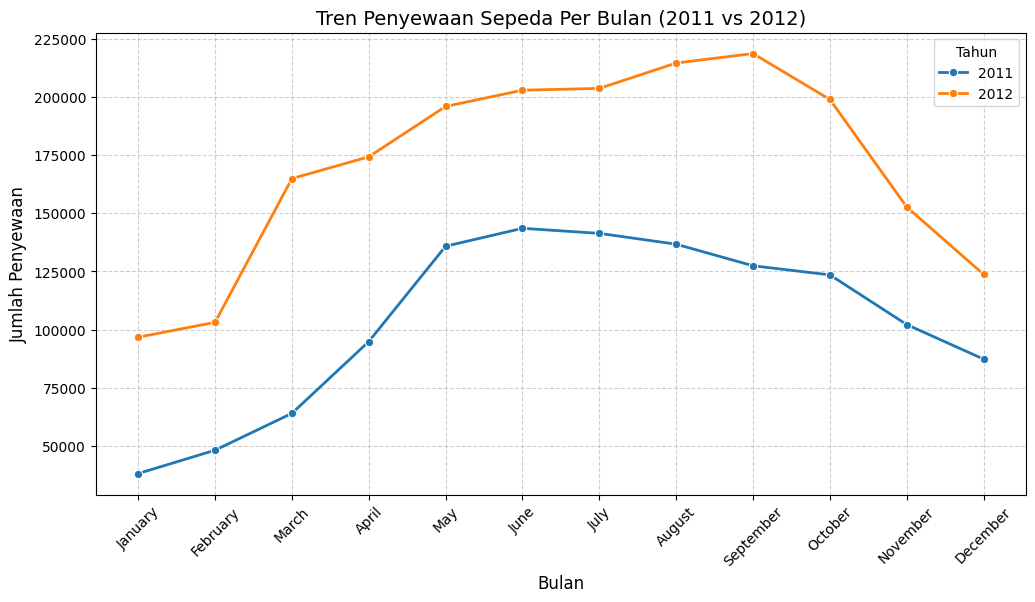

In [26]:
# Mapping nilai numerik ke nama bulan dan tahun
mapping_yr = {0: '2011', 1: '2012'}
mapping_mnth = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

day_df['yr'] = day_df['yr'].map(mapping_yr)
day_df['mnth'] = day_df['mnth'].map(mapping_mnth)

# Mengelompokkan data berdasarkan tahun dan bulan, lalu menghitung total penyewaan
monthly_trend = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Mengurutkan bulan sesuai urutan kalender
order_months = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
monthly_trend['mnth'] = pd.Categorical(monthly_trend['mnth'], categories=order_months, ordered=True)

# Plot visualisasi tren penyewaan sepeda per bulan untuk tahun 2011 dan 2012
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='mnth', y='cnt', hue='yr', marker='o', linewidth=2)

plt.title('Tren Penyewaan Sepeda Per Bulan (2011 vs 2012)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tahun')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

1. Peningkatan Penyewaan di Tahun 2012
* Secara keseluruhan, jumlah penyewaan sepeda di tahun 2012 lebih tinggi dibandingkan tahun 2011 di setiap bulan.
* Hal ini menunjukkan adanya peningkatan permintaan terhadap layanan penyewaan sepeda.
  
2. Pola Musiman dalam Penyewaan
* Penyewaan sepeda cenderung mengalami peningkatan dari bulan Januari hingga puncaknya di bulan Juni hingga September, sebelum mulai menurun kembali pada akhir tahun.
* Tren ini dapat dilihat pada kedua tahun, menunjukkan bahwa musim dan cuaca yang mungkin menjadi faktor utama dalam menentukan jumlah penyewaan.

3. Perbedaan Pola Antara 2011 dan 2012
* Di tahun 2011, peningkatan penyewaan terjadi secara bertahap dari Januari hingga Juni, lalu stagnan dari Juli hingga September, sebelum akhirnya menurun.
* Sebaliknya, di tahun 2012, peningkatan penyewaan terjadi dengan lebih cepat, terutama dari Februari ke Maret, dengan lonjakan signifikan pada bulan April.
* Puncak penyewaan di 2012 juga lebih tinggi dan bertahan lebih lama dibandingkan 2011.
  
4. Penurunan Penyewaan pada Akhir Tahun
* Pada kedua tahun, jumlah penyewaan mengalami penurunan yang cukup tajam setelah bulan September, dengan titik terendah di bulan Desember.


#### Pertanyaan 2:

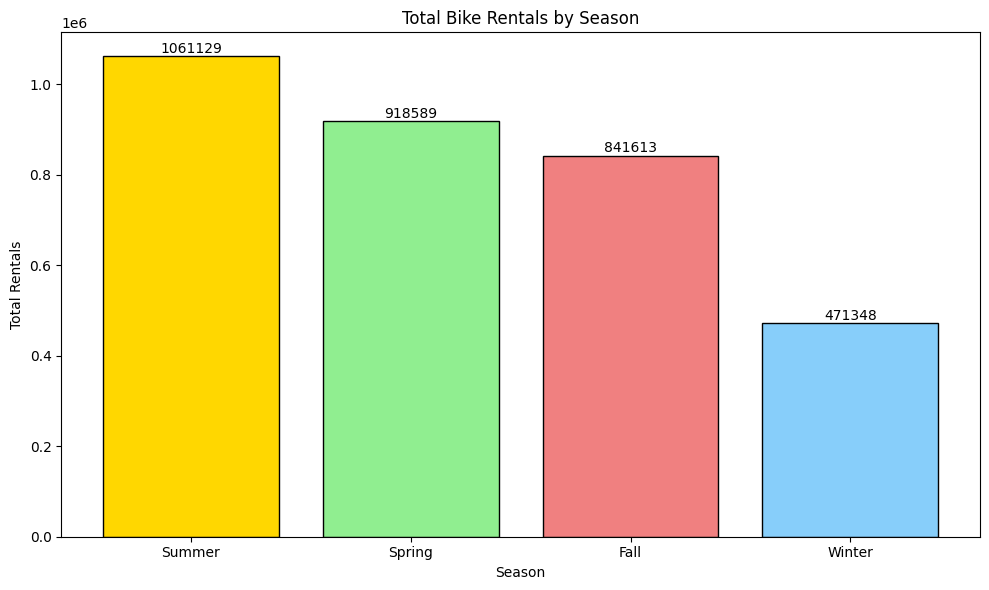

In [27]:
# Mengelompokkan dan menjumlahkan rental berdasarkan musim
seasonal_counts = day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)

# Memetakan kode musim ke nama musim
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
seasonal_counts.index = seasonal_counts.index.map(season_mapping)

# Warna untuk setiap musim
season_colors = {
    'Winter': 'lightskyblue',
    'Spring': 'lightgreen',
    'Summer': 'gold',
    'Fall': 'lightcoral'
}

# Membuat plot
plt.figure(figsize=(10, 6))
sizes = seasonal_counts.values
labels = seasonal_counts.index
colors = [season_colors[label] for label in labels]

plt.bar(labels, sizes, color=colors, edgecolor='black')

plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Season')

# Menambahkan label nilai di atas setiap batang
for i, value in enumerate(sizes):
    plt.text(i, value + 500, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Terlihat bahwa musim panas memiliki jumlah penyewaan tertinggi dengan 1.061.129 penyewaan. Hal ini kemungkinan besar disebabkan oleh cuaca yang lebih mendukung untuk aktivitas luar ruangan, hari yang lebih panjang, serta liburan musim panas yang meningkatkan mobilitas masyarakat.

## Analisis Lanjutan Tanpa Mengggunakan Machine Learning

In [ ]:
Saya mencoba untuk menganalisis Penyewaan sepeda untuk setiap harinya

In [35]:
clustering = hour_df.groupby(['weekday', 'hr'])['cnt'].sum().unstack()

print(clustering)

hr         0     1     2     3    4     5      6      7      8      9   ...  \
weekday                                                                 ...   
0        9775  8053  6286  3239  955   852   1493   3476   8805  16437  ...   
1        3571  1800  1021   496  567  2252   8930  25848  42868  22718  ...   
2        2790  1254   687   382  508  2470  10863  30569  48122  24118  ...   
3        3594  1595   797   484  477  2678  11212  31614  50786  24807  ...   
4        4045  1774   934   497  528  2669  11066  31388  50323  24810  ...   
5        5453  2571  1325   673  589  2486   9363  26450  48077  26935  ...   
6        9902  7117  5302  2403  804   854   2205   4826  12020  19613  ...   

hr          14     15     16     17     18     19     20     21     22     23  
weekday                                                                        
0        38181  37163  37317  33471  28626  23675  17643  13403   9883   6499  
1        20041  21046  29583  52249  50060  3583

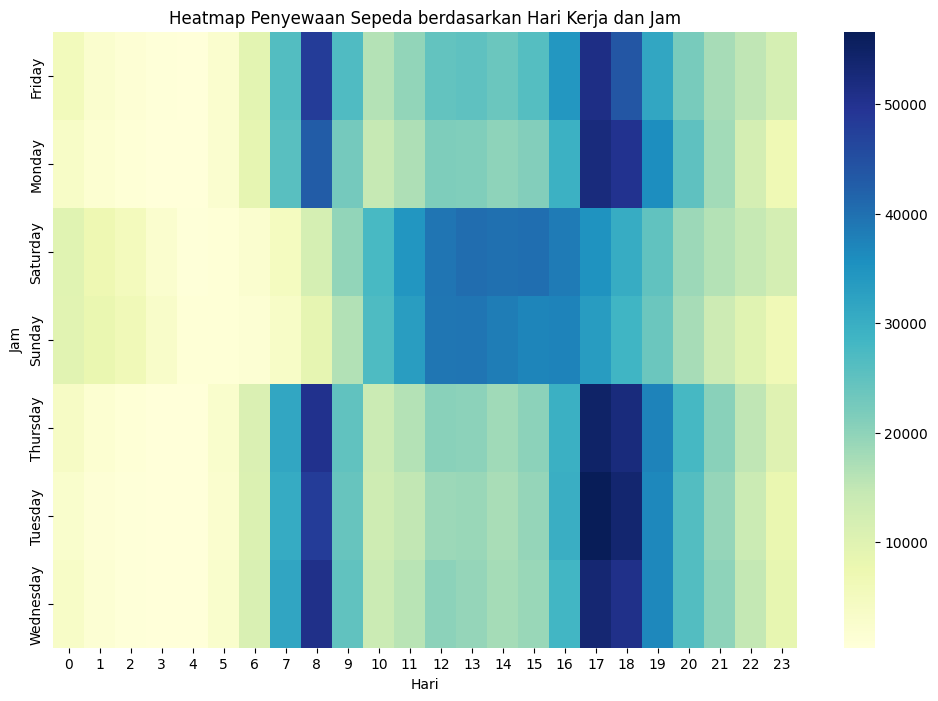

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(clustering, cmap="YlGnBu", annot=False, fmt=".0f")
plt.title('Heatmap Penyewaan Sepeda berdasarkan Hari Kerja dan Jam')
plt.xlabel('Hari')
plt.ylabel('Jam')
plt.show()

1. Puncak penyewaan terjadi pada jam 7-9 pagi dan jam 17-19 sore di hari kerja (Senin-Jumat).
2. Pada akhir pekan (Sabtu-Minggu), pola penyewaan lebih tersebar merata sepanjang hari, dengan peningkatan aktivitas pada siang hingga sore hari.

## Kesimpulan

1. Bagaimana tren penyewaan sepeda per bulan pada tahun 2011 dan 2012?
Berdasarkan analisis tren penyewaan sepeda per bulan:
* Tahun 2012 memiliki jumlah penyewaan yang lebih tinggi dibandingkan tahun 2011 di setiap bulan.
* Tren penyewaan meningkat secara bertahap sejak awal tahun, mencapai puncaknya pada bulan Juni-September, lalu menurun setelah bulan Oktober.
* Tahun 2011 menunjukkan pola yang mirip dengan tahun 2012 tetapi dengan jumlah penyewaan yang lebih rendah.
Hal ini menunjukkan adanya pertumbuhan popularitas layanan penyewaan sepeda dari tahun 2011 ke 2012.

2. Pada musim apa terjadi penyewaan tertinggi sepanjang tahun 2011-2012?
Berdasarkan hasil analisis:
* Musim panas (Summer) memiliki jumlah penyewaan tertinggi, diikuti oleh musim semi (Spring) dan musim gugur (Fall).
* Musim dingin (Winter) memiliki jumlah penyewaan terendah, yang kemungkinan besar disebabkan oleh cuaca dingin dan kondisi jalan yang kurang mendukung untuk bersepeda.
Hal ini menunjukkan bahwa penyewaan sepeda lebih diminati pada musim yang lebih hangat.

tambahan:
Menurut pendapat saya, dataset day.csv lebih cocok digunakan karena sudah berisi data agregat harian, sehingga memudahkan analisis tren bulanan dan musiman tanpa perlu agregasi tambahan seperti pada hour.csv, yang berisi data per jam. Dengan cakupan informasi tentang bulan, tahun, dan musim, dataset ini lebih efisien dalam menampilkan pola jangka panjang tanpa noise dari fluktuasi per jam. Selain itu, pemrosesan data menjadi lebih ringan karena jumlah baris lebih sedikit dibandingkan hour.csv, sehingga lebih cepat dalam eksplorasi data.